In [26]:
import pandas as pd

In [27]:
csvFileName = './data/morphologyMatrix_DG_Atlas_V3_20181206114005.csv'
plotLabel = 'Atlas_V3'

In [28]:
morphologyDF = pd.read_csv(csvFileName)

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
from lib.plot_functions import HCcolors as c
from lib.plot_functions import make_color_map

In [31]:
def time_stamp():
    import datetime

    today = datetime.datetime.now()
    timeStampStr = ['{}'.format(today.year), \
                    '{:0>2}'.format(today.month), \
                    '{:0>2}'.format(today.day), \
                    '{:0>2}'.format(today.hour), \
                    '{:0>2}'.format(today.minute)]
    return ''.join(timeStampStr)

In [32]:
DG = 0
CA3 = 1
CA2 = 2
CA1 = 3
Sub = 4
EC = 5

nNeurons, nParcels = morphologyDF.shape

vTab = 1.5

In [33]:
if (plotLabel.find('ARA') > -1):
    nParcellations = (3,5,4,4,2)

    layerNames = ('SM','SG','H', \
                  'SLM','SR','SL','SP','SO', \
                  'SLM','SR','SP','SO', \
                  'SLM','SR','SP','SO', \
                  'SM','SR')
else:
    nParcellations = (3,1,1,1,1)

    layerNames = ('SM','SG','H', \
                  ' ', \
                  ' ', \
                  ' ', \
                  ' ')

In [34]:
displayFontSize = 3
if (nNeurons < 100):
    displayFontSize = 6
if (nNeurons < 50):
    displayFontSize = 8
    
shadingLineWidths = 1.0

In [35]:
print "Making color map ...\n"
colors = [c.WHITE,
          c.BLUE,
          c.RED,
          c.PURPLE]
morphologyColorMap = make_color_map(colors)

Making color map ...



Plotting data ...

Labeling axes ...



Text(-8,-1,'Atlas_V3')

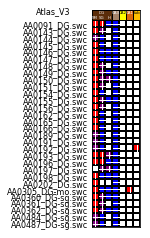

In [47]:
print "Plotting data ...\n"
fig = plt.figure()
ax = fig.add_subplot(111)

ax.set_aspect("equal")

plt.pcolormesh(morphologyDF.iloc[0:nNeurons, 1:nParcels], cmap=morphologyColorMap, edgecolors=c.BLACK, linewidth=shadingLineWidths)

plt.xlim(0, nParcels-1)
plt.ylim(-vTab, nNeurons)

plt.gca().invert_yaxis()

plt.tick_params(
    axis="x",          # changes apply to the x-axis
    which="both",      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False, # labels along the bottom edge are off
    labeltop=False)    # labels along the top edge are off
    
plt.tick_params(
    axis="y",          # changes apply to the x-axis
    which="both",      # both major and minor ticks are affected
    left=False,        # ticks along the left edge are off
    right=False,       # ticks along the right edge are off
    labelleft=False,   # labels along the left edge are off
    labelright=False)  # labels along the right edge are off

for i in range(nNeurons):
    for j in range(1, nParcels):
        ### add horizontal white lines to neurite locations with axons
        if (morphologyDF.iloc[i, j] == 1.0) | (morphologyDF.iloc[i, j] == 3.0):
            plt.plot([j-1.0+0.1, j-1.0+0.9], [i+0.5, i+0.5], 'w', linewidth=shadingLineWidths)
        
        ### add vertical white lines to neurite locations with dendrites
        if (morphologyDF.iloc[i, j] == 2.0) | (morphologyDF.iloc[i, j] == 3.0):
            plt.plot([j-1.0+0.5, j-1.0+0.5], [i+0.1, i+0.9], 'white', linewidth=shadingLineWidths)

print "Labeling axes ...\n"
for i in range(nNeurons):        
    ax.text(-0.5, float(i+1), morphologyDF.loc[i]['File_Names'], rotation=0, horizontalalignment="right", fontsize=displayFontSize)

### color-coded tags for the subregions
ax.add_patch(plt.Rectangle((sum(nParcellations[DG:DG]), -vTab), nParcellations[DG], vTab, edgecolor=c.BLACK, facecolor=c.BROWN_DG))
ax.add_patch(plt.Rectangle((sum(nParcellations[DG:CA3]), -vTab), nParcellations[CA3], vTab, edgecolor=c.BLACK, facecolor=c.BROWN_CA3))
ax.add_patch(plt.Rectangle((sum(nParcellations[DG:CA2]), -vTab), nParcellations[CA2], vTab, edgecolor=c.BLACK, facecolor=c.YELLOW_CA2))
ax.add_patch(plt.Rectangle((sum(nParcellations[DG:CA1]), -vTab), nParcellations[CA1], vTab, edgecolor=c.BLACK, facecolor=c.ORANGE_CA1))
ax.add_patch(plt.Rectangle((sum(nParcellations[DG:Sub]), -vTab), nParcellations[Sub], vTab, edgecolor=c.BLACK, facecolor=c.YELLOW_Sub))

DGtab  = nParcellations[DG]/2.0
CA3tab = nParcellations[DG] + nParcellations[CA3]/2.0
CA2tab = nParcellations[DG] + nParcellations[CA3] + nParcellations[CA2]/2.0
CA1tab = nParcellations[DG] + nParcellations[CA3] + nParcellations[CA2] + nParcellations[CA1]/2.0
Subtab = nParcellations[DG] + nParcellations[CA3] + nParcellations[CA2] + nParcellations[CA1] + nParcellations[Sub]/2.0

ax.text(DGtab, -1, 'DG', fontsize=displayFontSize/2, color=c.WHITE, horizontalalignment='center')
ax.text(CA3tab, -1, 'CA3', fontsize=displayFontSize/2, color=c.WHITE, horizontalalignment='center')
ax.text(CA2tab, -1, 'CA2', fontsize=displayFontSize/2, color=c.BLACK, horizontalalignment='center')
ax.text(CA1tab, -1, 'CA1', fontsize=displayFontSize/2, color=c.WHITE, horizontalalignment='center')
ax.text(Subtab, -1, 'Sub', fontsize=displayFontSize/2, color=c.BLACK, horizontalalignment='center')

for j in range(len(layerNames)):
    if (plotLabel.find('ARA') > -1):
        if (j in (0, 1, 2, 3, 4, 5, 6, 7, 12, 13, 14, 15)):
            ax.text(float(j)+0.5, -0.25, layerNames[j], fontsize=displayFontSize/2, color=c.WHITE, horizontalalignment='center')
        else:
            ax.text(float(j)+0.5, -0.25, layerNames[j], fontsize=displayFontSize/2, color=c.BLACK, horizontalalignment='center')
    else:
        if (j in (0, 1, 2, 3, 5)):
            ax.text(float(j)+0.5, -0.25, layerNames[j], fontsize=displayFontSize/2, color=c.WHITE, horizontalalignment='center')
        else:
            ax.text(float(j)+0.5, -0.25, layerNames[j], fontsize=displayFontSize/2, color=c.BLACK, horizontalalignment='center')

ax.text(-8.0, -1.0, plotLabel, fontsize=displayFontSize)

In [48]:
outputFileName = "output/morphology_matrix_{}_{}.pdf".format(plotLabel, time_stamp())
print "Saving data to pdf file {} ...\n".format(outputFileName)    
fig.savefig(outputFileName, dpi=600)

Saving data to pdf file output/morphology_matrix_Atlas_V3_201812201158.pdf ...

